### Student Performance Prediction
   * Understanding the problem statement
   * Data Collection
   * Data Ingestion (Reading/loading the data into environment)
   * Data Cleaning (Handling errors, removing outliers, etc.)
   * Missing Value Imputation (Filling in missing data)
   * Duplicate Value Handling (Removing or handling duplicates)
   * Exploratory Data Analysis (EDA) (Understanding the data, patterns, and relationships)
   * Outlier Detection and Handling (Optional)
   * Separating the Target Variable (y) from Independent Variables (X)
   * Feature Selection & Extraction (Choosing the most relevant features)
   * Data Transformation (Optional) (e.g., log transformations)
   * Feature Encoding (Converting categorical variables into numerical ones)
   * Train-Test Splitting
   * Feature Standardization/Normalization
   * Model Training
   * Cross-Validation (Optional) (If using it to validate performance before tuning)
   * Model Evaluation
   * Hyperparameter Tuning
   * Model Re-training
   * Model Selection
   * Model Deployment
   * Post-Deployment Monitoring and Maintenance (Optional)

1) Problem statement
* Develop a prediction model to forecast student performance based on the given variables

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data collection & reading

In [2]:

data=pd.read_csv('data/stud.csv')
data.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
print(f"This data consists {data.shape[0]} rows and {data.shape[1]} columns")

This data consists 1000 rows and 8 columns


In [4]:
data.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
data.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
[features for features in data.columns]

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [9]:
for feature in data.columns:
    if data[feature].dtype=='O':
        print(f"{feature}:-> {data[feature].unique()}")
    elif data[feature].dtype!='O':
        print(f"{feature}")

gender:-> ['female' 'male']
race_ethnicity:-> ['group B' 'group C' 'group A' 'group D' 'group E']
parental_level_of_education:-> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch:-> ['standard' 'free/reduced']
test_preparation_course:-> ['none' 'completed']
math_score
reading_score
writing_score


In [10]:
# define numerical and categorical features
num_features=[feature for feature in data.columns if data[feature].dtype!='O']
cat_features=[feature for feature in data.columns if data[feature].dtype=='O']
print(f"There is {len(num_features)} numerical features,{num_features}")
print("                              &")
print(f"{len(cat_features)}, categorical features {cat_features} present in this data")

There is 3 numerical features,['math_score', 'reading_score', 'writing_score']
                              &
5, categorical features ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course'] present in this data


In [11]:
data[num_features]

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [12]:
data['Total_Score']=data[num_features].sum(axis=1)
data['Average_Score']=data[num_features].mean(axis=1).round(3)

In [13]:
data.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.667
1,female,group C,some college,standard,completed,69,90,88,247,82.333


In [14]:
# reading_full=data[data['reading_score']==100]['Average_Score'].count()
# writing_full=data[data.writing_score==100]['Average_Score'].count()
# math_full=data[data.math_score==100]['Average_Score'].count()
# print(f"Number of Students with full marks in Maths {math_full}")
# print(f"Number of Students with full marks in Reading {reading_full}")
# print(f"Number of Students with full marks in Writing {writing_full}")

In [15]:
for subjects in num_features:
    full_marks_count=data[data[subjects]==100]['Average_Score'].count()
    print(f"Number of students with full marks in {subjects.replace('_score','').capitalize()}: {full_marks_count}")
    

Number of students with full marks in Math: 7
Number of students with full marks in Reading: 17
Number of students with full marks in Writing: 14


In [16]:
for subject in num_features:
    less_mark_count=data[data[subject]<=20]['Average_Score'].count()
    print(f"Number of students with less marks in {(subject.replace('_score',''))} {less_mark_count} students")

Number of students with less marks in math 4 students
Number of students with less marks in reading 1 students
Number of students with less marks in writing 3 students


observations:

best performance in reading section.

worst performance in maths.

4. ### Exploring Data ( Visualization )
    * Histogram
    * KDE 

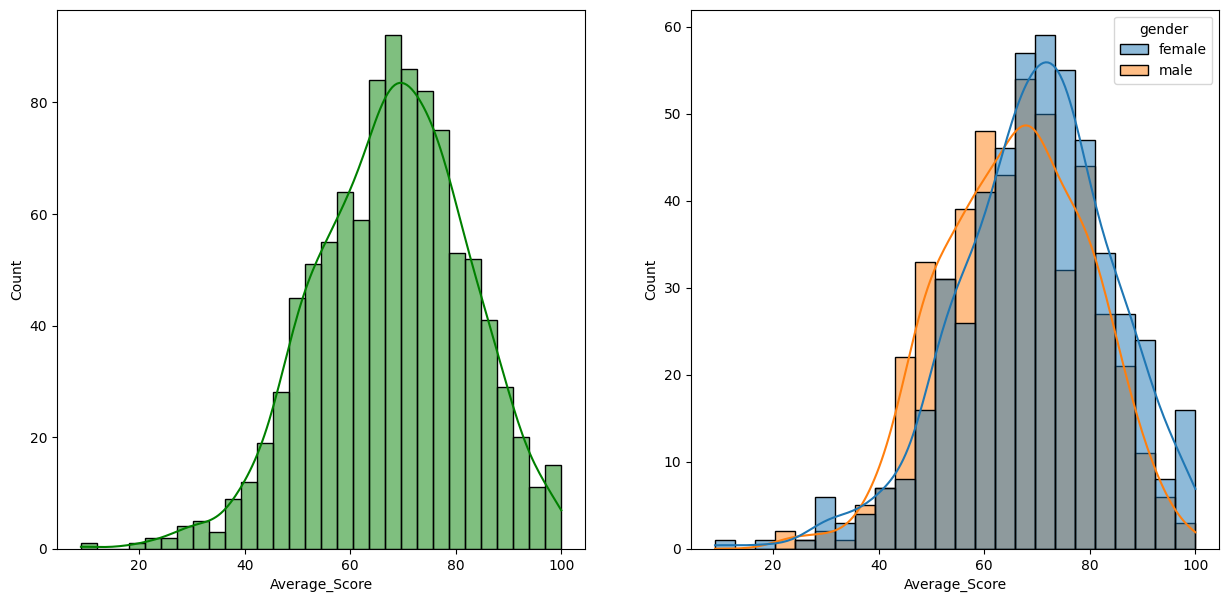

In [17]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='Average_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Average_Score',kde=True,hue='gender')
plt.show()

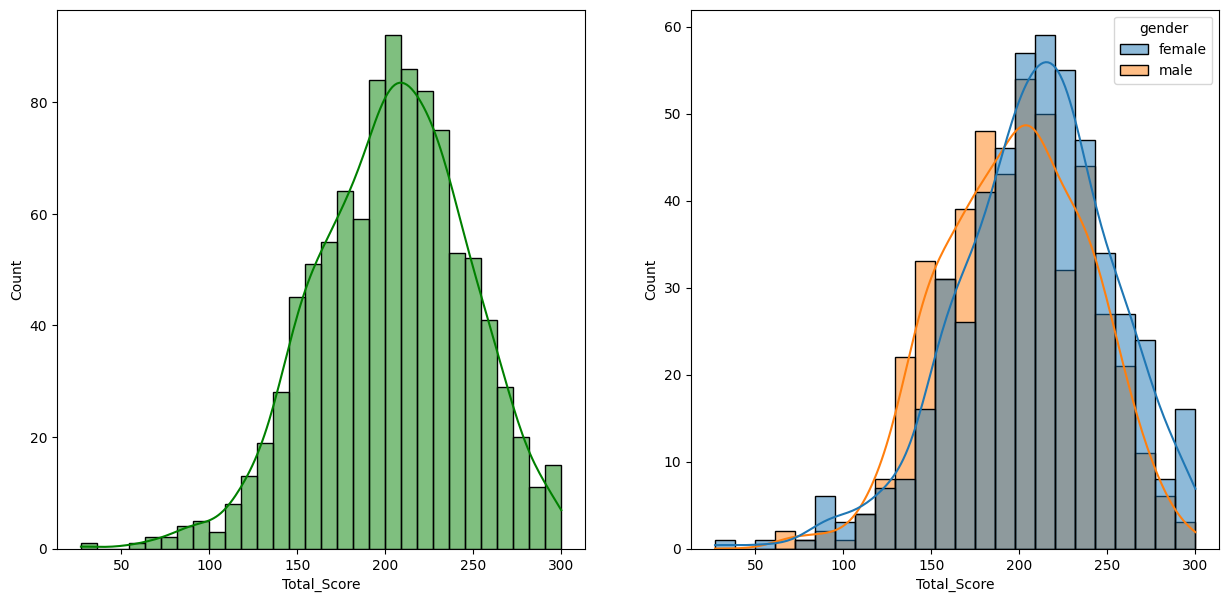

In [18]:
fig,axs=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=data,x='Total_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='Total_Score',kde=True,hue='gender')
plt.show()

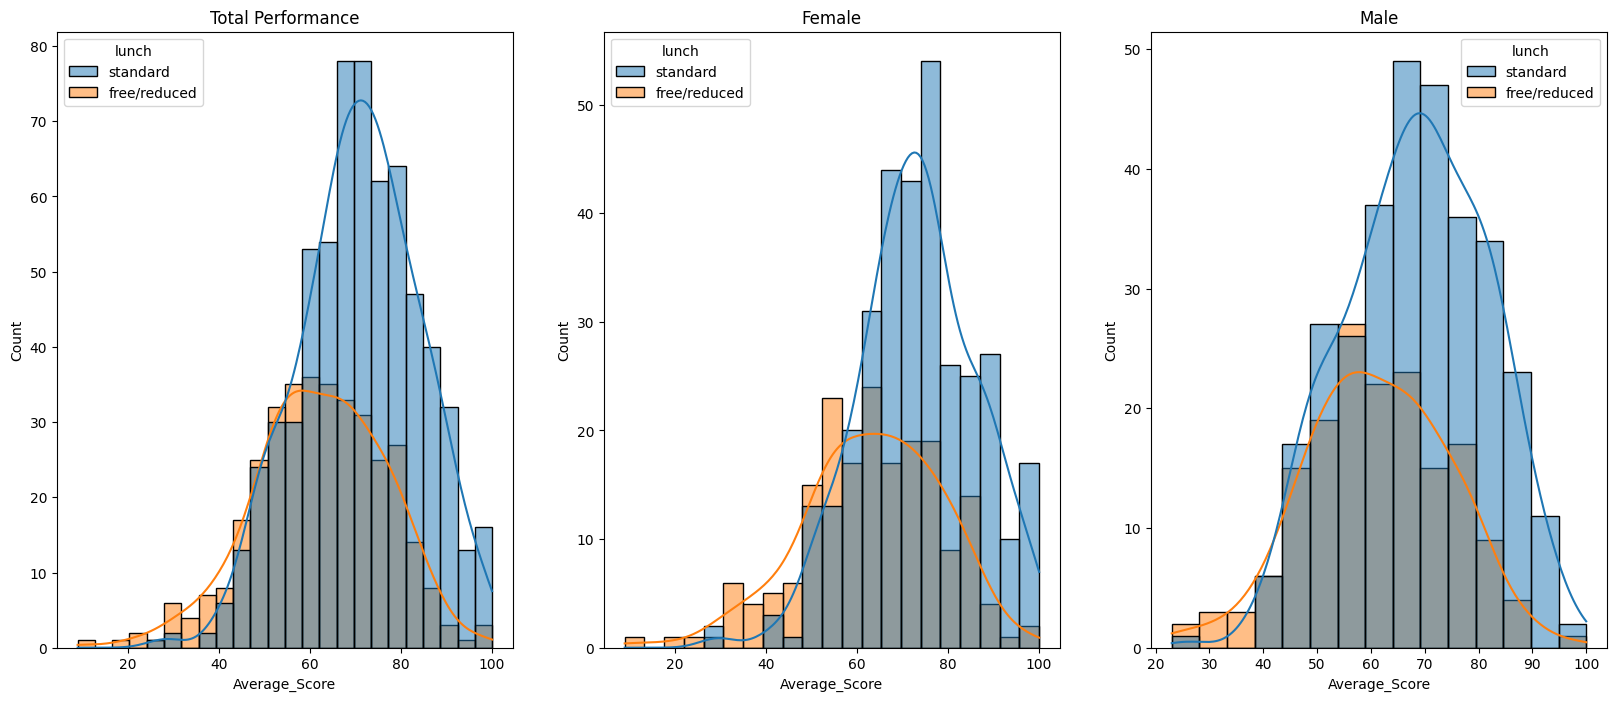

In [19]:
plt.subplots(1,3,figsize=(20,8))
plt.subplot(131)
plt.title("Total Performance")
sns.histplot(x=data.Average_Score,kde=True,hue=data.lunch)
plt.subplot(132)
plt.title("Female")
sns.histplot(data=data[data.gender=='female'],x='Average_Score',kde=True,hue=data.lunch)
plt.subplot(133)
plt.title("Male")
sns.histplot(data=data[data.gender=='male'],x='Average_Score',kde=True,hue=data.lunch)
plt.show()

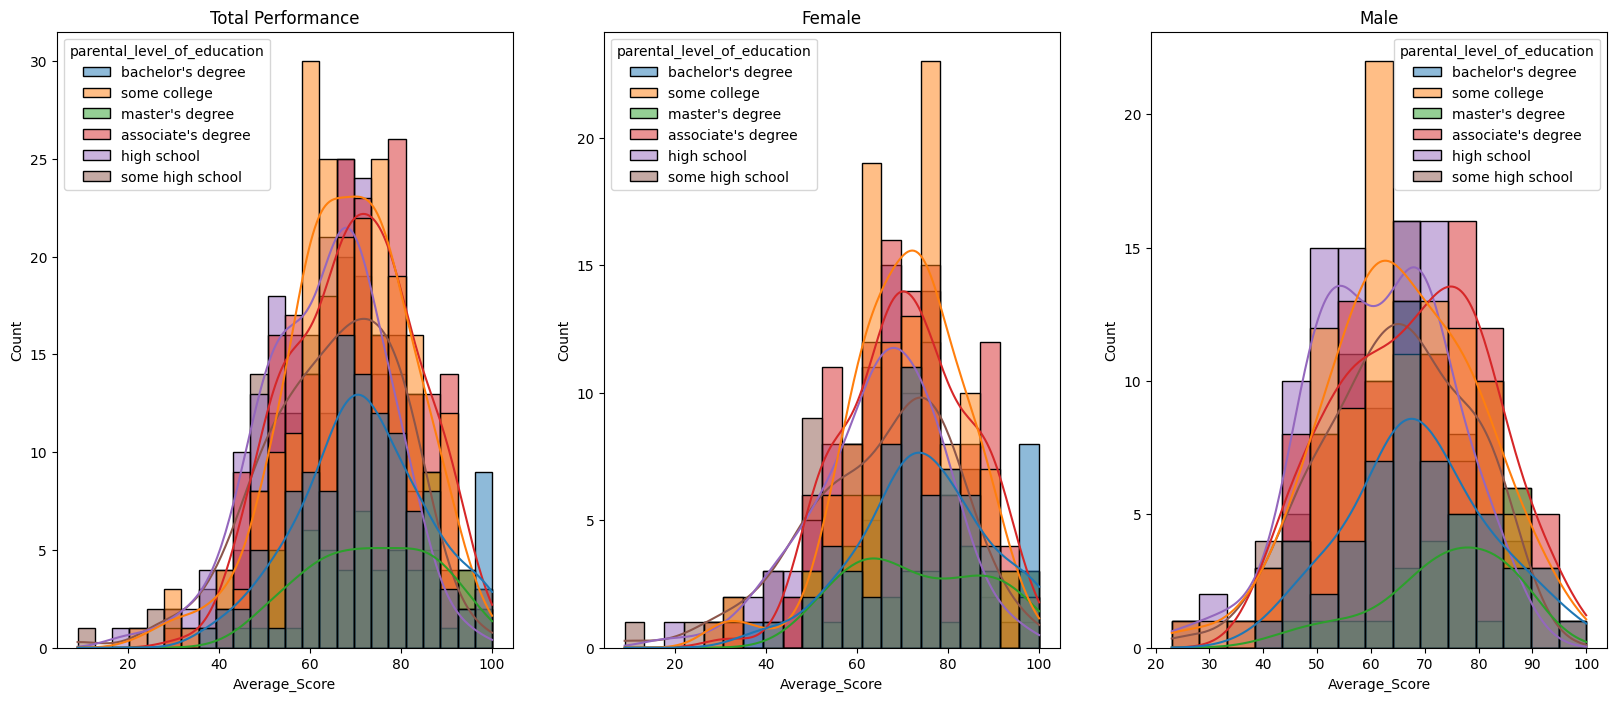

In [20]:
plt.subplots(1,3,figsize=(20,8))
plt.subplot(131)
plt.title("Total Performance")
sns.histplot(x=data.Average_Score,kde=True,hue=data.parental_level_of_education)
plt.subplot(132)
plt.title("Female")
sns.histplot(data=data[data.gender=='female'],x='Average_Score',kde=True,hue=data.parental_level_of_education)
plt.subplot(133)
plt.title("Male")
sns.histplot(data=data[data.gender=='male'],x='Average_Score',kde=True,hue=data.parental_level_of_education)
plt.show()

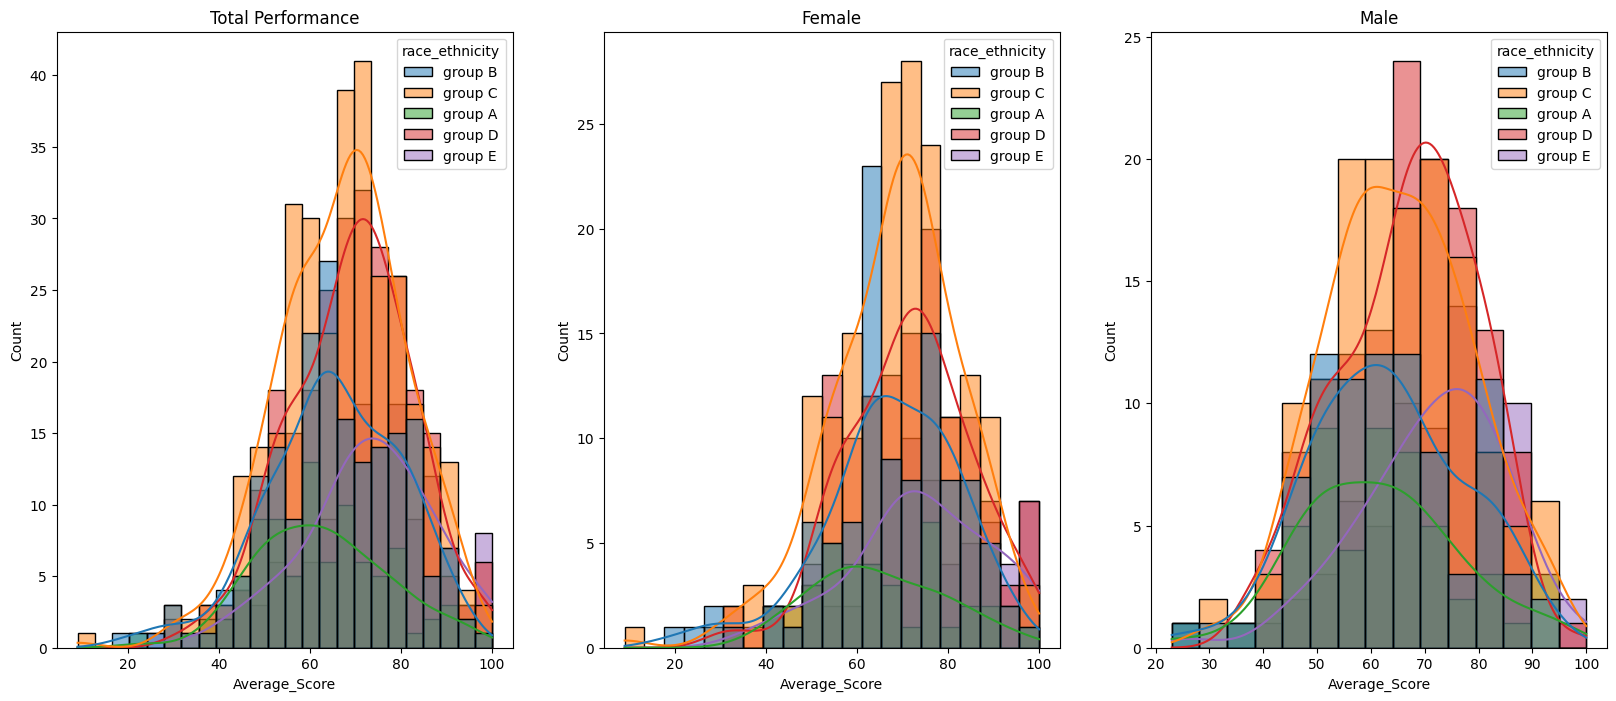

In [21]:
plt.subplots(1,3,figsize=(20,8))
plt.subplot(131)
plt.title("Total Performance")
sns.histplot(x=data.Average_Score,kde=True,hue=data.race_ethnicity)
plt.subplot(132)
plt.title("Female")
sns.histplot(data=data[data.gender=='female'],x='Average_Score',kde=True,hue=data.race_ethnicity)
plt.subplot(133)
plt.title("Male")
sns.histplot(data=data[data.gender=='male'],x='Average_Score',kde=True,hue=data.race_ethnicity)
plt.show()


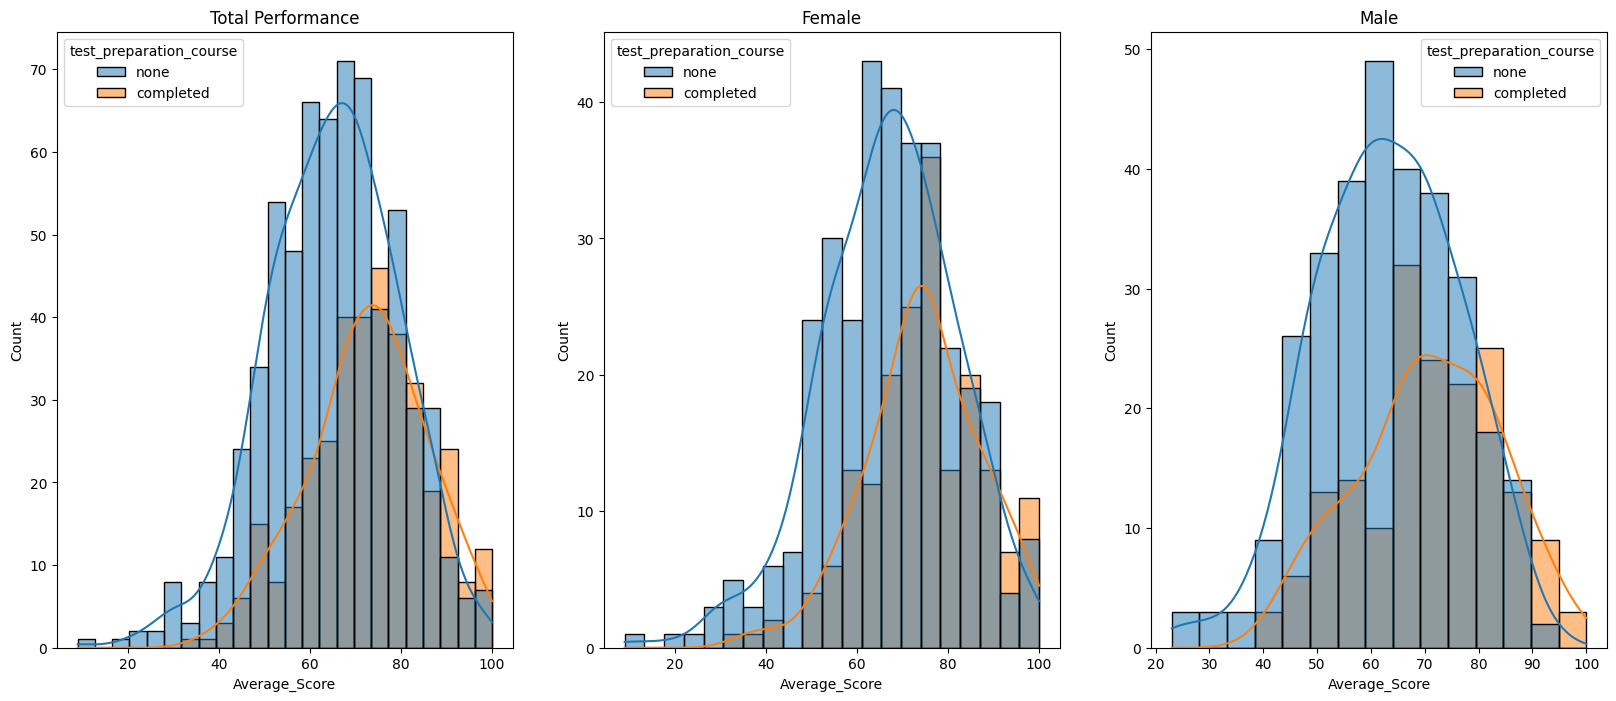

In [22]:
plt.subplots(1,3,figsize=(20,8))
plt.subplot(131)
plt.title("Total Performance")
sns.histplot(x=data.Average_Score,kde=True,hue=data.test_preparation_course)
plt.subplot(132)
plt.title("Female")
sns.histplot(data=data[data.gender=='female'],x='Average_Score',kde=True,hue=data.test_preparation_course)
plt.subplot(133)
plt.title("Male")
sns.histplot(data=data[data.gender=='male'],x='Average_Score',kde=True,hue=data.test_preparation_course)
plt.show()


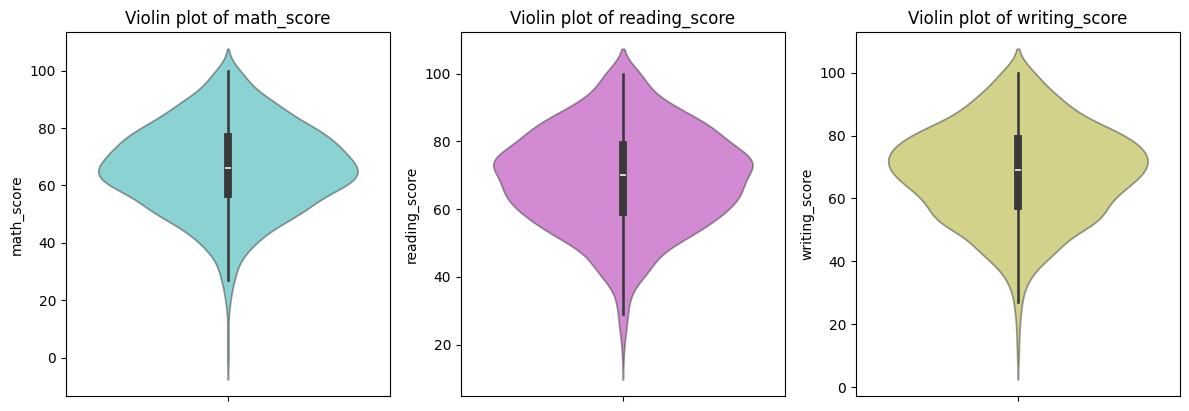

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ['c', 'm', 'y', 'k', 'r', 'g']  # List of colors to cycle through

plt.figure(figsize=(12, 8))

for idx, (i, color) in enumerate(zip(data[num_features], colors), 1):
    plt.subplot(2, 3, idx)
    sns.violinplot(y=data[i], color=color,alpha=0.5)  # Use dynamic color
    plt.title(f'Violin plot of {i}')

plt.tight_layout()
plt.show()


4.3 Multivariate Analysis using pieplot

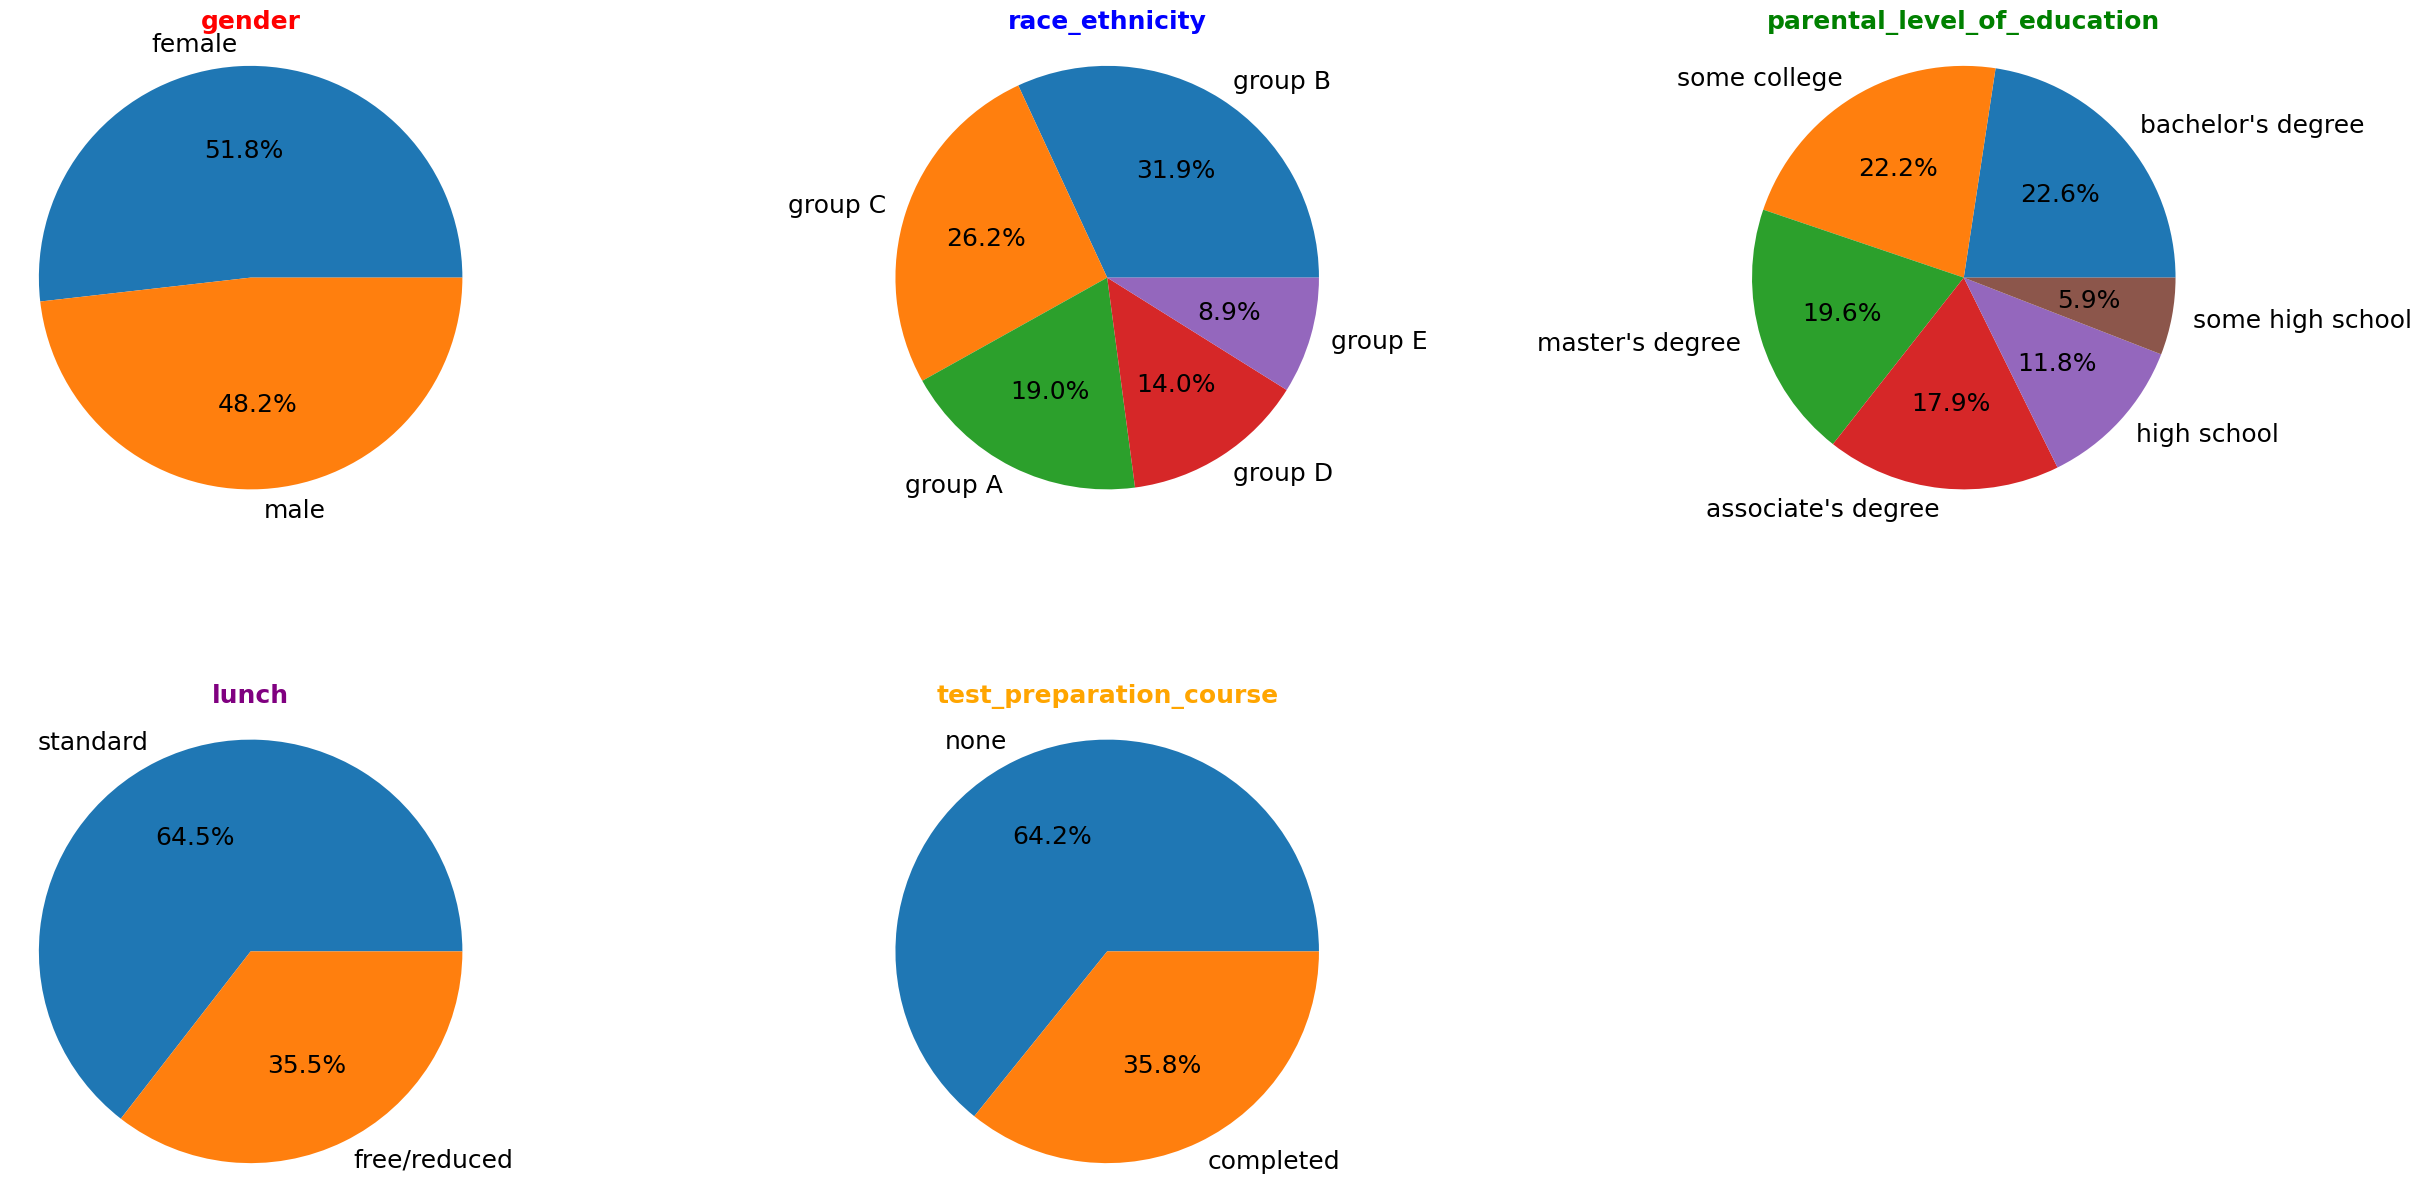

In [24]:
plt.rcParams['figure.figsize']=(30,15)
title_colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown']

for idx,i in enumerate(data[cat_features]):
    plt.subplot(2,3,(idx+1))
    size=data[i].value_counts()
    labels=data[i].unique()
    plt.pie(size,labels=labels,autopct='%.1f%%',textprops={'fontsize':18},radius=1.1)
    plt.title(cat_features[idx],fontsize=18,fontweight='bold',color=title_colors[idx % len(title_colors)])
plt.subplots_adjust(hspace=0.4,wspace=0.4)
plt.show()
    

In [25]:
gender_wise_performance_Total=data.groupby('gender')['Total_Score'].sum()

gender_wise_performance_Average=round(data.groupby('gender')['Average_Score'].mean().reset_index(),1)
gender_wise_performance_Average

,gender,Average_Score
0,female,69.6
1,male,65.8


In [26]:
gender_wise_performance_subject=round(data.groupby('gender')[['math_score','reading_score','writing_score','Average_Score']].mean(),1)
gender_wise_performance_subject

,math_score,reading_score,writing_score,Average_Score
gender,,,,
female,63.6,72.6,72.5,69.6
male,68.7,65.5,63.3,65.8


In [31]:
ethnicity_wise_performance=round(data.groupby('race_ethnicity')[['Average_Score']].mean(),1).sort_values(by='Average_Score',ascending=False)
ethnicity_wise_performance

,Average_Score
race_ethnicity,
group E,72.8
group D,69.2
group C,67.1
group B,65.5
group A,63.0


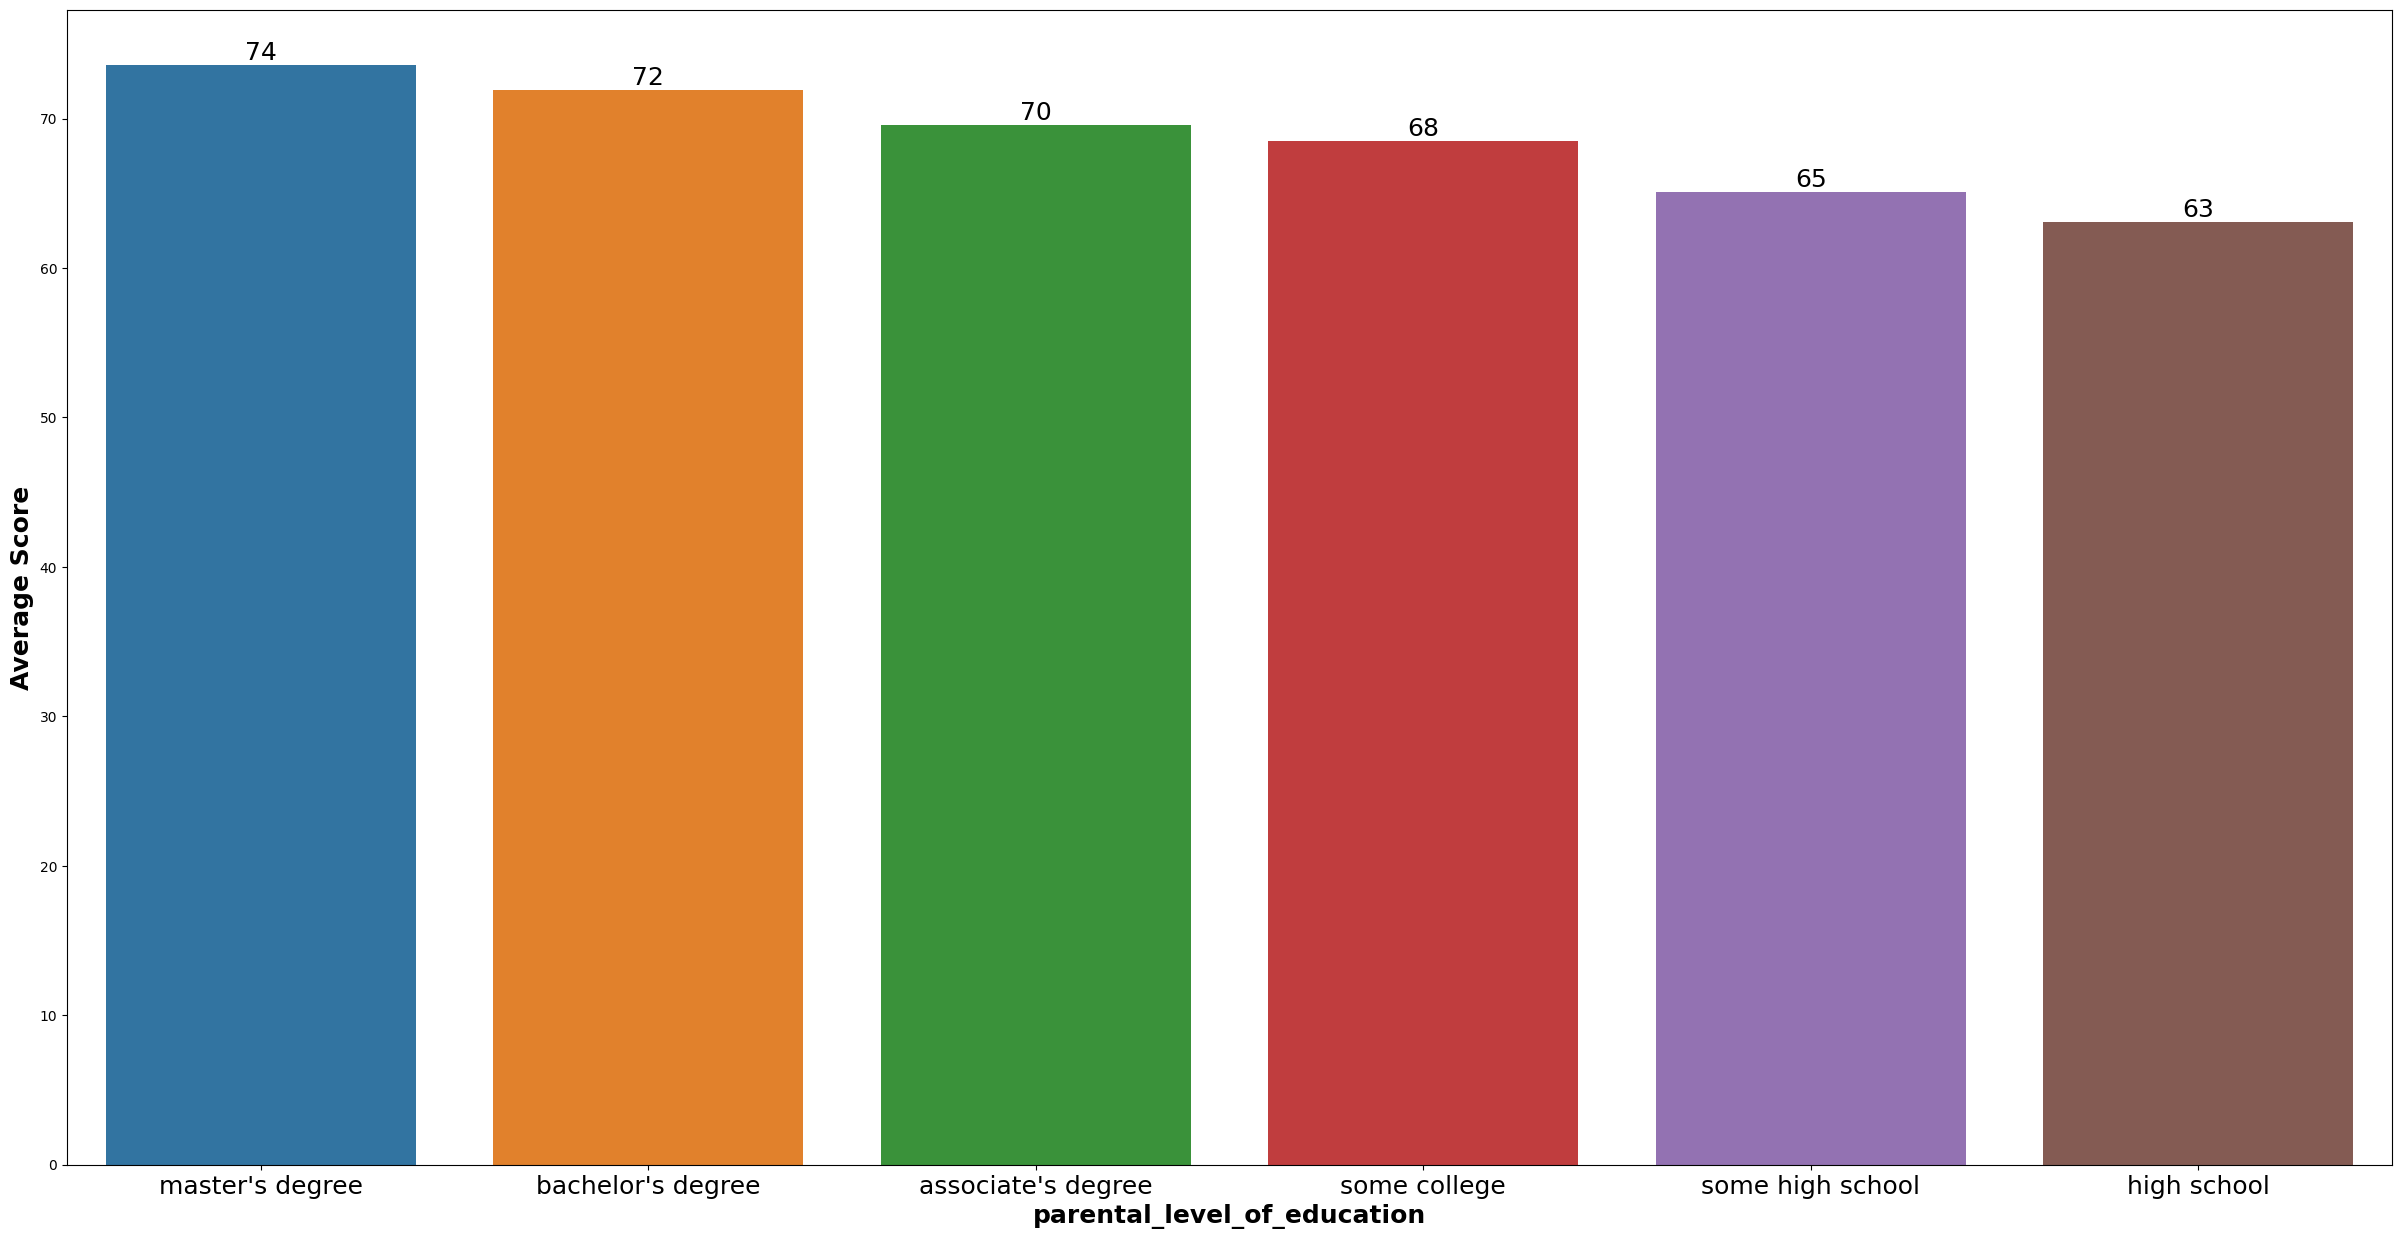

In [55]:
p_education_wise_performance=round(data.groupby('parental_level_of_education')[['Average_Score']].mean(),1).sort_values(by='Average_Score',ascending=False)
bar_plot=sns.barplot(data=p_education_wise_performance,x='parental_level_of_education',y='Average_Score',hue='parental_level_of_education')
for container in bar_plot.containers:
    bar_plot.bar_label(container,fmt='%.f',fontsize=18)
plt.xticks(fontsize=18)
plt.xlabel('parental_level_of_education',fontsize=18,weight='bold')
plt.ylabel('Average Score',fontsize=18,weight='bold')
plt.show()

In [58]:
test_prep_course_wise_performance=round(data.groupby('test_preparation_course')[['math_score','reading_score','writing_score','Average_Score']].mean(),1).sort_values(by='Average_Score',ascending=False)
test_prep_course_wise_performance

,math_score,reading_score,writing_score,Average_Score
test_preparation_course,,,,
completed,69.7,73.9,74.4,72.7
none,64.1,66.5,64.5,65.0


### Outlier detection

In [63]:
n_feature_col=[]
for n_feature in data.columns:
    if data[n_feature].dtype!='O':
        n_feature_col.append(n_feature)
n_feature_col

['math_score',
 'reading_score',
 'writing_score',
 'Total_Score',
 'Average_Score']

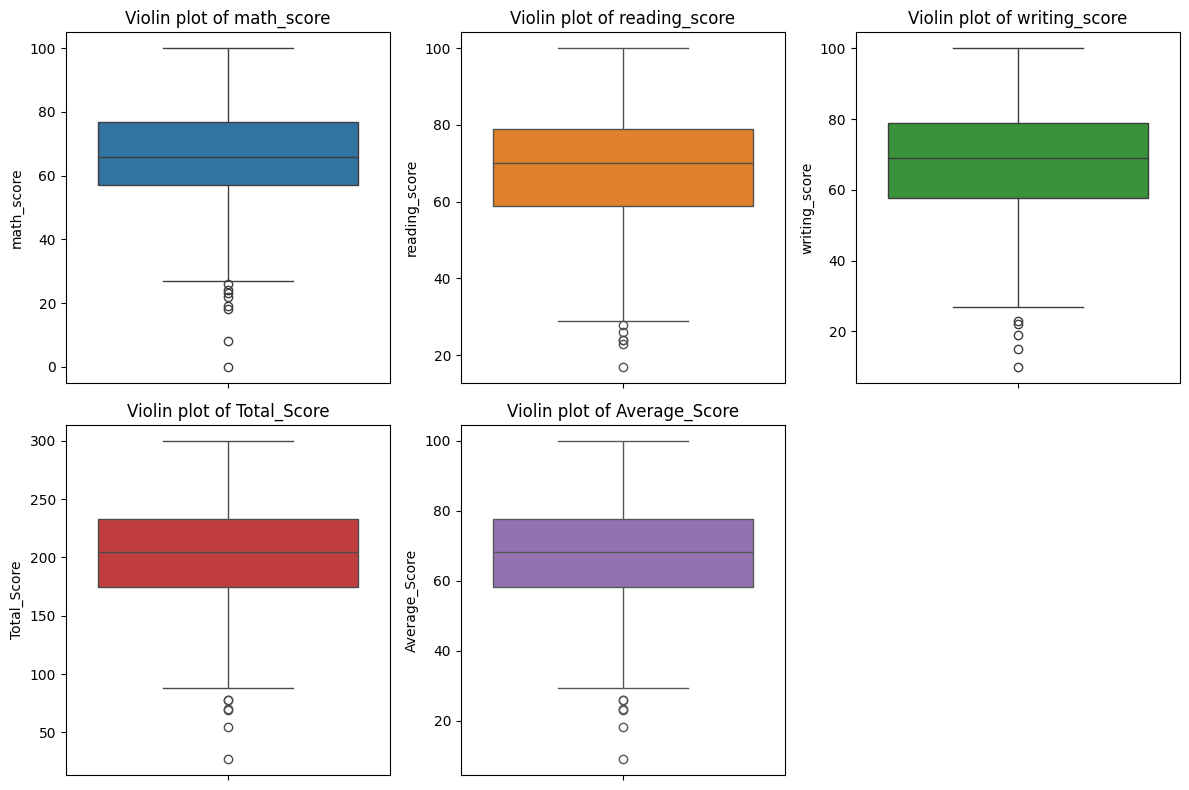

In [73]:


plt.figure(figsize=(12, 8))

for idx, (i, color) in enumerate(zip(data[n_feature_col], colors), 1):
    plt.subplot(2, 3, idx)
    sns.boxplot(y=data[i], color=color)  # Use dynamic color
    plt.title(f'Violin plot of {i}')

plt.tight_layout()
plt.show()

### 4.4.7 Multivariage Analysis using pair plot

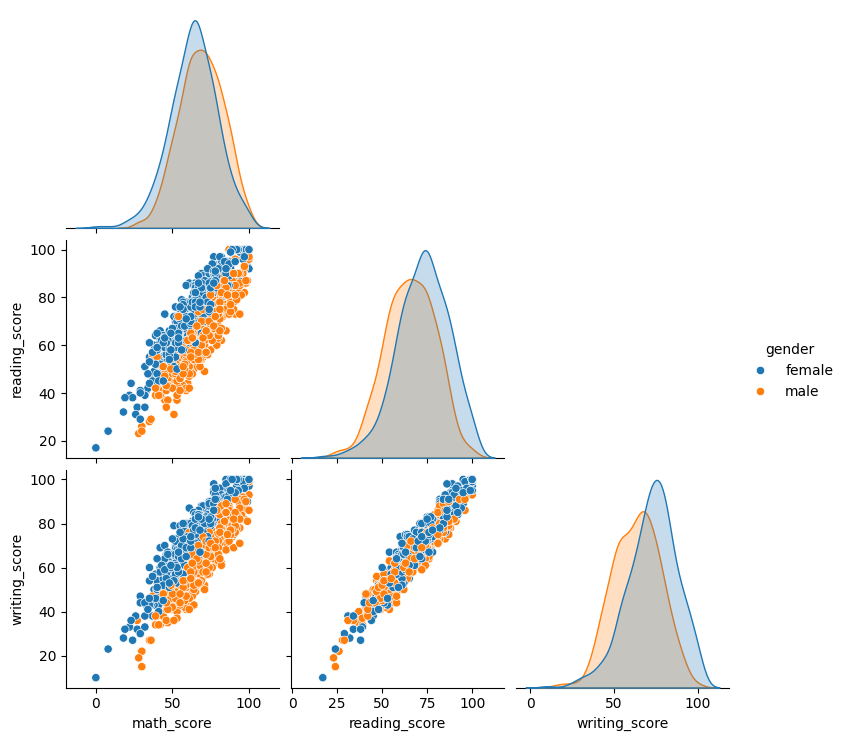

In [79]:
data_1=data.drop(['Average_Score','Total_Score'],axis=1)
sns.pairplot(data_1,hue='gender',corner=True)
plt.show()

Observations:
* Overall, female students perform better.
* Standard lunch is associated with better exam performance.
* Most students score between 60-80 in Maths, whereas in Reading and Writing, most score between 50-80.
* 64% of students did not take a test preparation course.
* 64% of students opt for standard lunch.
* Gender distribution is balanced in the data.
* Female candidates perform better overall than male candidates.
* Male candidates score higher in Maths, while female candidates perform better in Reading and Writing.
* The largest group of students comes from group B (32%), followed by group C (26%).
* Group E has the highest average performance (72%), followed by group D (69%).
* Students pursue the program regardless of their parental educational background.
* Parental education has a slight influence on students' average performance.
* Taking a test preparation course helps students score higher.
* According to the pair plot, all subjects show a positive linear correlation.